In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import tensorflow as tf
import joblib

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [3]:
#parameters
F = 1  # Fixed face value
t = 0     # Fixed initial time
k = 1     # Fixed Gamma shape
th = 163500000    # Fixed Gamma scale
c=0.05
r=0.03
kappa=0.2
theta=0.03
sigma=0.02
nr = 10000

D=9*1000000000
lam=35
N=2
T=1

In [40]:
# Define custom objects dictionary
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the saved model
model_gamma = tf.keras.models.load_model("best_NN_gamma.h5", custom_objects=custom_objects)

# Define the feature names (match the original dataset used to fit the scaler)
feature_names = ["r", "lambda", "D", "N", "T"]  # Update with actual names

# Load the fitted scaler
scaler = joblib.load("scaler_gamma.pkl")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


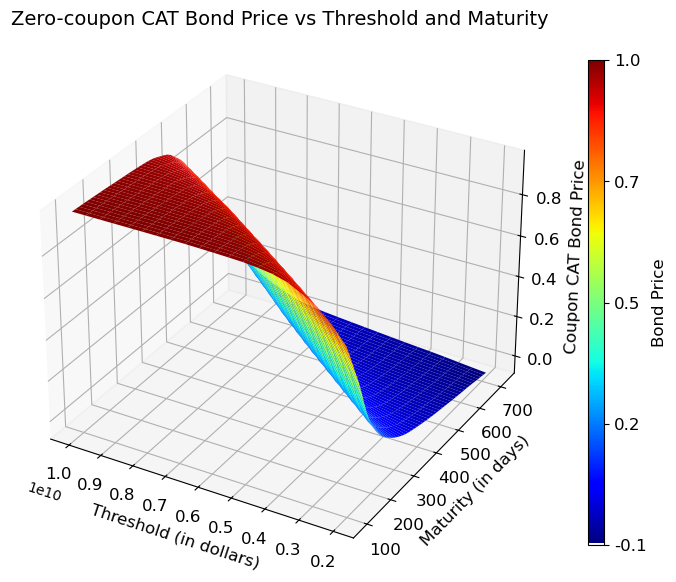

In [68]:
# Sample values for fixed inputs
r = 0.03
lam = 35  # lambda
N = 0  # N

# Sample data (you can replace this with your actual model predictions)
threshold_values = np.linspace(2, 10, 20) * 1e9  # Example threshold levels (in billion)
maturity_values = np.linspace(90, 720, 50)  # Example expiration times (in years)

# Create meshgrid for threshold and maturity
D, T = np.meshgrid(threshold_values, maturity_values)

# Prepare an empty array for the bond prices (z-values)
bond_prices = np.zeros_like(D)

# Flatten the grid to create a batch of inputs
input_data_batch = []
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        input_data_batch.append([r, lam, D[i, j], N, T[i, j] * 1/360])

# Convert the batch of inputs to a NumPy array
input_data_batch = np.array(input_data_batch)

# Scale the batch inputs using the scaler
input_scaled_batch = scaler.transform(input_data_batch)

# Predict the bond prices in one batch using the model
predictions_batch = model_gamma.predict(input_scaled_batch)

# Reshape the predictions back into the grid shape
bond_prices = predictions_batch.reshape(D.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (threshold vs maturity vs bond price)
surf = ax.plot_surface(D, T, bond_prices, cmap='jet', edgecolor='none')

# Add labels and title
ax.set_xlabel('Threshold (in dollars)', fontsize=12)
ax.set_ylabel('Maturity (in days)', fontsize=12)
ax.set_zlabel('Coupon CAT Bond Price', fontsize=12)
ax.set_title('Zero-coupon CAT Bond Price vs Threshold and Maturity', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

# Reverse the X-axis (greatest value to the left)
ax.invert_xaxis()

# Move the Z-axis to the left
ax.zaxis.set_tick_params(labelright=False)  # Remove ticks from the right side
ax.zaxis.set_tick_params(labelleft=True)   # Enable ticks on the left side

# Add a color bar with more control over the appearance
cbar = fig.colorbar(surf, shrink=0.9, aspect=30)
cbar.set_label('Bond Price', fontsize=12)
cbar.ax.tick_params(labelsize=12)

# Set ticks with 1 decimal place
ticks = np.linspace(np.min(bond_prices), np.max(bond_prices), 5)  # Adjust number of ticks
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{tick:.1f}" for tick in ticks])  # Format to 1 decimal place

plt.savefig('CAT_gamma_price.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


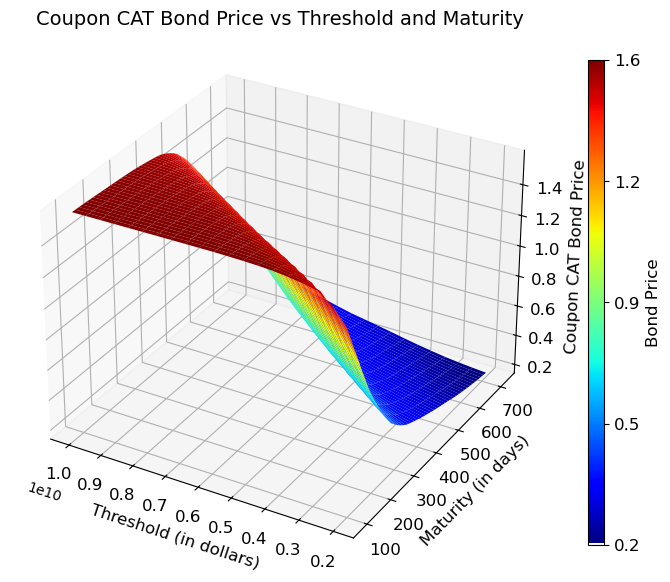

In [66]:
# Sample values for fixed inputs
r = 0.03
lam = 35  # lambda
N = 12  # N

# Sample data (you can replace this with your actual model predictions)
threshold_values = np.linspace(2, 10, 20) * 1e9  # Example threshold levels (in billion)
maturity_values = np.linspace(90, 720, 50)  # Example expiration times (in years)

# Create meshgrid for threshold and maturity
D, T = np.meshgrid(threshold_values, maturity_values)

# Prepare an empty array for the bond prices (z-values)
bond_prices = np.zeros_like(D)

# Flatten the grid to create a batch of inputs
input_data_batch = []
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        input_data_batch.append([r, lam, D[i, j], N, T[i, j] * 1/360])

# Convert the batch of inputs to a NumPy array
input_data_batch = np.array(input_data_batch)

# Scale the batch inputs using the scaler
input_scaled_batch = scaler.transform(input_data_batch)

# Predict the bond prices in one batch using the model
predictions_batch = model_gamma.predict(input_scaled_batch)

# Reshape the predictions back into the grid shape
bond_prices = predictions_batch.reshape(D.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (threshold vs maturity vs bond price)
surf = ax.plot_surface(D, T, bond_prices, cmap='jet', edgecolor='none')

# Add labels and title
ax.set_xlabel('Threshold (in dollars)', fontsize=12)
ax.set_ylabel('Maturity (in days)', fontsize=12)
ax.set_zlabel('Coupon CAT Bond Price', fontsize=12)
ax.set_title('Coupon CAT Bond Price vs Threshold and Maturity', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

# Reverse the X-axis (greatest value to the left)
ax.invert_xaxis()

# Move the Z-axis to the left
ax.zaxis.set_tick_params(labelright=False)  # Remove ticks from the right side
ax.zaxis.set_tick_params(labelleft=True)   # Enable ticks on the left side

# Add a color bar with more control over the appearance
cbar = fig.colorbar(surf, shrink=0.9, aspect=30)
cbar.set_label('Bond Price', fontsize=12)
cbar.ax.tick_params(labelsize=12)

# Set ticks with 1 decimal place
ticks = np.linspace(np.min(bond_prices), np.max(bond_prices), 5)  # Adjust number of ticks
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{tick:.1f}" for tick in ticks])  # Format to 1 decimal place

plt.savefig('CAT_gamma_price_12coupons.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

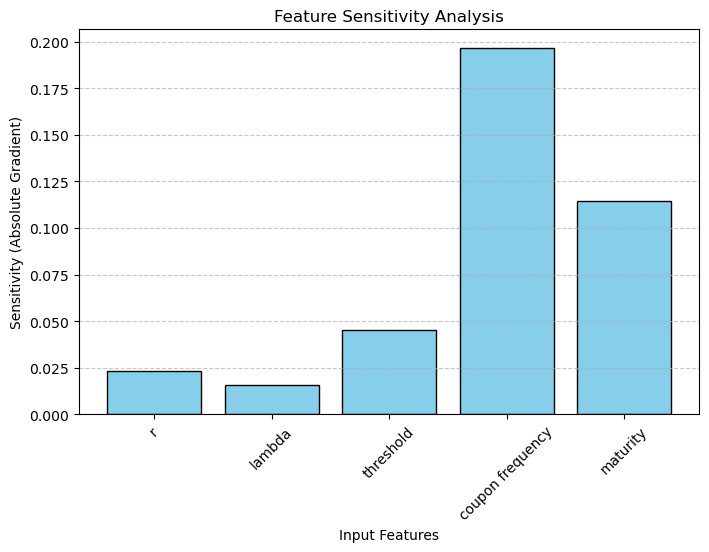

In [46]:
# Example input: Replace this with the actual input shape expected by model
new_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Modify based on model's input shape

# Convert new_input to a DataFrame
new_input_df = pd.DataFrame(new_input, columns=feature_names)

# Apply the same scaling
new_input_scaled = scaler.transform(new_input_df)

# Convert input to TensorFlow tensor with gradient tracking
new_input_tensor = tf.convert_to_tensor(new_input_scaled, dtype=tf.float32)
new_input_tensor = tf.Variable(new_input_tensor)  # Convert to variable to enable differentiation

# Compute gradients of the model's prediction with respect to inputs
with tf.GradientTape() as tape:
    tape.watch(new_input_tensor)  # Track changes in input
    prediction = model_gamma(new_input_tensor)  # Forward pass

# Compute gradients (sensitivity of prediction to each input feature)
gradients = tape.gradient(prediction, new_input_tensor)

# Convert gradients to NumPy array for analysis
sensitivity = gradients.numpy().flatten()

# Define feature names (adjust according to your model's inputs)
feature_names = ["r", "lambda", "threshold", "coupon frequency", "maturity"]

# Plot sensitivity analysis results
plt.figure(figsize=(8, 5))
plt.bar(feature_names, np.abs(sensitivity), color='skyblue', edgecolor='black')
plt.xlabel("Input Features")
plt.ylabel("Sensitivity (Absolute Gradient)")
plt.title("Feature Sensitivity Analysis")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


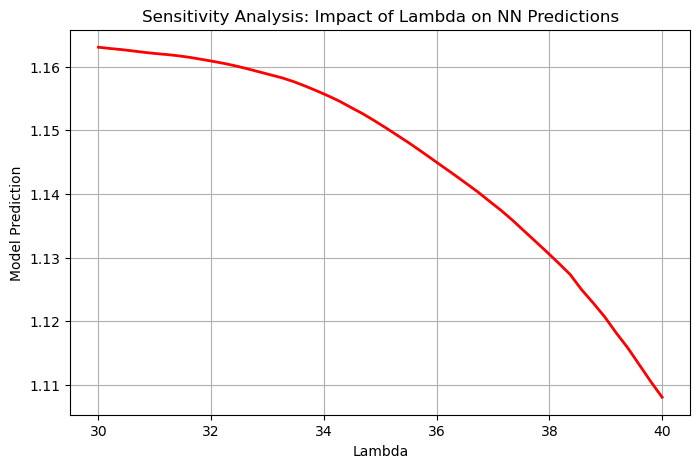

In [52]:
# Baseline input (modify based on your dataset)
base_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Feature values

# Define the range of values for sensitivity analysis
lambda_range = np.linspace(30, 40, 50)

# Create a batch of inputs by varying lambda
batch_inputs = np.array([base_input.copy() for _ in lambda_range])  # Create a batch with shape (50, 1, 4)

# Adjust lambda values in each row of the batch
for idx, lam in enumerate(lambda_range):
    batch_inputs[idx, 0, 1] = lam  # Modify the lambda value (first column)

# Reshape the batch_inputs to 2D for scaling
batch_inputs_2d = batch_inputs.reshape(len(lambda_range), -1)  # Flatten into 2D array (50, 4)

# Scale input data (now batch_inputs_2d is 2D)
batch_inputs_scaled = scaler.transform(batch_inputs_2d)  # Scale the entire batch

# Predict using the model for the entire batch
predictions = model_gamma.predict(batch_inputs_scaled)

# Extract the predictions and store them
sensitivity_values = predictions[:, 0]  # Assuming model output is a single scalar value per input

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(lambda_range, sensitivity_values, label="NN Prediction", color='red', linewidth=2)
plt.xlabel("Lambda")
plt.ylabel("Model Prediction")
plt.title("Sensitivity Analysis: Impact of Lambda on NN Predictions")
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


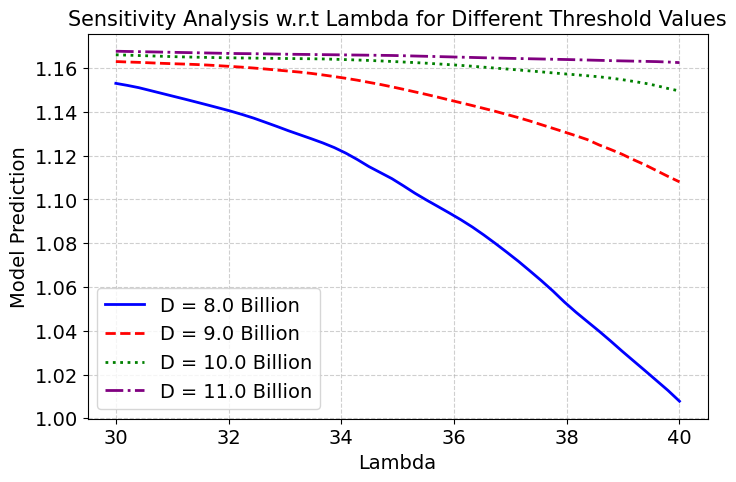

In [72]:
# Define baseline input (Modify based on model's expected input format)
base_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Example: (Feature 1, Feature 2, Feature 3, Feature 4)

# Define a range for Feature 1
lambda_range = np.linspace(30, 40, 50)  # Vary Feature 1 

# Define different fixed values for Feature 2
D_values = np.array([8, 9, 10, 11]) * 1e9

# Colors and line styles for better visualization
colors = ['blue', 'red', 'green', 'purple']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

plt.figure(figsize=(8, 5))

# Iterate over different fixed values of Feature 2 (D values)
for idx, D in enumerate(D_values):
    sensitivity_values = []  # Store predictions

    # Create a batch of inputs where each input corresponds to a different lambda
    batch_inputs = np.array([base_input.copy() for _ in lambda_range])  # Create a batch with shape (50, 1, 4)

    # Modify Feature 1 (lambda) for each row in the batch and set Feature 2 (D) to the fixed value
    for i, lam in enumerate(lambda_range):
        batch_inputs[i, 0, 1] = lam  # Set lambda value for each row in the batch
        batch_inputs[i, 0, 2] = D    # Set the fixed threshold (D) value for each row in the batch

    # Reshape the batch_inputs to 2D for scaling
    batch_inputs_2d = batch_inputs.reshape(len(lambda_range), -1)  # Flatten into (50, 4)

    # Scale the batch input data
    batch_inputs_scaled = scaler.transform(batch_inputs_2d)  # Scale the entire batch

    # Predict using the model for the entire batch
    predictions = model_gamma.predict(batch_inputs_scaled)

    # Extract the predictions and store them
    sensitivity_values = predictions[:, 0]  # Assuming model output is a scalar value per input
    
    # Plot sensitivity for this Feature 2 value
    plt.plot(lambda_range, sensitivity_values, label=f"D = {D/1e9} Billion",
             color=colors[idx], linestyle=linestyles[idx], linewidth=2)


# Customize plot appearance
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t Lambda for Different Threshold Values", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

plt.savefig('Sensitivity_lambda_D.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


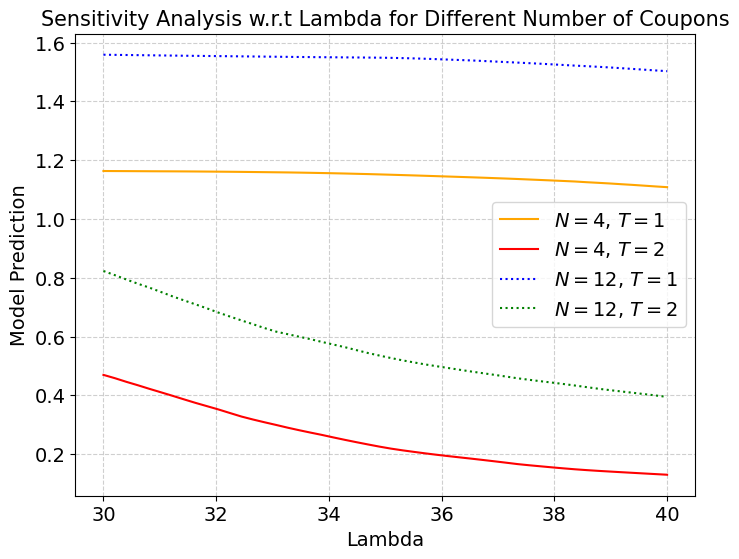

In [74]:
# Define baseline input (Modify based on model's expected input format)
base_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Example: (Feature 1, Feature 2, Feature 3, Feature 4)

# Define a range for Feature 1
lambda_range = np.linspace(30, 40, 50)  # Vary Feature 1 

# Fixed Feature 2 value
D = 9e9  # Set your fixed value

# Define different pairs of Feature 3 and Feature 4
feature_pairs = [(4, 1), (4, 2), (12,1), (12, 2)]
colors = ["orange", "red", "blue", "green"]  # Different colors for each pair
linestyles = ['solid', 'solid', 'dotted', 'dotted']

# Create the plot
plt.figure(figsize=(8, 6))

for (feat3, feat4), color, linestyle in zip(feature_pairs, colors, linestyles):
    # Prepare to store predictions for this pair
    CAT = [] 

    # Create a batch of inputs for this feature pair
    batch_inputs = np.array([base_input.copy() for _ in lambda_range])  # Create a batch with shape (50, 1, 4)

    # Modify lambda, Feature 3, and Feature 4 for each row in the batch
    for i, lam in enumerate(lambda_range):
        batch_inputs[i, 0, 1] = lam  # Set lambda
        batch_inputs[i, 0, 3] = feat3  # Set Feature 3
        batch_inputs[i, 0, 4] = feat4  # Set Feature 4

    # Reshape the batch to 2D for scaling
    batch_inputs_2d = batch_inputs.reshape(len(lambda_range), -1)  # Flatten into (50, 4)

    # Scale the input batch
    batch_inputs_scaled = scaler.transform(batch_inputs_2d)  # Scale the entire batch

    # Predict using the model for the entire batch
    predictions = model_gamma.predict(batch_inputs_scaled)

    # Extract the predictions for this pair and store them
    CAT = predictions[:, 0]  # Assuming the model output is scalar per input

    # Plot GA Change
    plt.plot(lambda_range, CAT, label=fr"$N={feat3}$, $T={feat4}$", color=color, linestyle=linestyle)


# Customize plot appearance
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t Lambda for Different Number of Coupons", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

plt.savefig('Sensitivity_lambda_coupon.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


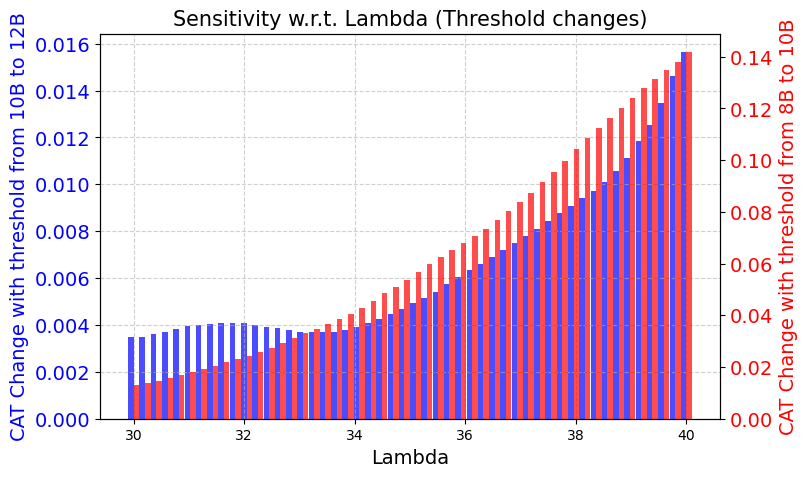

In [80]:
r = 0.03
# Define the range for Feature 1 (lambda values)
lambda_values = np.linspace(30, 40, 50)

# Feature 2 values (comparison between 8e9, 10e9, and 12e9)
D_low = 8e9
D_high = 10e9
D_high2 = 12e9

# Prepare inputs for batch processing
batch_inputs_low = np.array([[r, lam, D_low, 4, 1] for lam in lambda_values])  # Feature 2 = 8e9
batch_inputs_high = np.array([[r, lam, D_high, 4, 1] for lam in lambda_values])  # Feature 2 = 10e9
batch_inputs_high2 = np.array([[r, lam, D_high2, 4, 1] for lam in lambda_values])  # Feature 2 = 12e9

# Scale all inputs at once
batch_inputs_low_scaled = scaler.transform(batch_inputs_low)
batch_inputs_high_scaled = scaler.transform(batch_inputs_high)
batch_inputs_high2_scaled = scaler.transform(batch_inputs_high2)

# Make predictions for all inputs in the batch
predictions_low = model_gamma.predict(batch_inputs_low_scaled)[:, 0]
predictions_high = model_gamma.predict(batch_inputs_high_scaled)[:, 0]
predictions_high2 = model_gamma.predict(batch_inputs_high2_scaled)[:, 0]

# Compute GA Change
CAT_change = predictions_high - predictions_low
CAT_change2 = predictions_high2 - predictions_high

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(8, 5))
bar_width = 0.1

# Plot blue bars (left y-axis)
ax1.bar(lambda_values - 0.05, CAT_change2, width=bar_width, alpha=0.7, color="blue", label="CAT Change with threshold from 10B to 12B")
ax1.set_xlabel("Lambda", fontsize=14)
ax1.set_ylabel("CAT Change with threshold from 10B to 12B", color="blue", fontsize=14)
ax1.tick_params(axis="y", labelcolor="blue", labelsize=14)

# Create second y-axis (right side)
ax2 = ax1.twinx()
ax2.bar(lambda_values + 0.05, CAT_change, width=bar_width, alpha=0.7, color="red", label="CAT Change with threshold from 8B to 10B")
ax2.set_ylabel("CAT Change with threshold from 8B to 10B", color="red", fontsize=14)
ax2.tick_params(axis="y", labelcolor="red", labelsize=14)

# Customize grid and title
ax1.grid(True, linestyle="--", alpha=0.6)
plt.title("Sensitivity w.r.t. Lambda (Threshold changes)", fontsize=15)

# Save the plot
plt.savefig('Sensitivity_change_lambda_D.eps', format='eps', bbox_inches='tight')

# Show plot
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


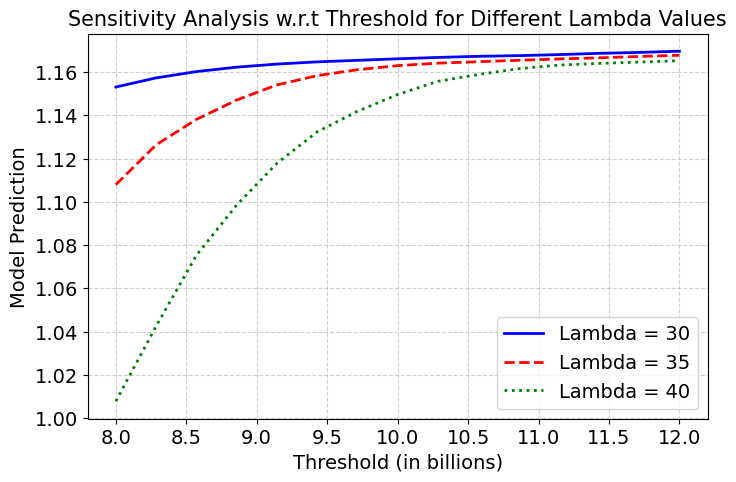

In [78]:
# Define baseline input (Modify based on model's expected input format)
base_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Example: (Feature 1, Feature 2, Feature 3, Feature 4)

# Define a range for Feature 2 (Threshold)
D_range = np.linspace(8, 12, 15) * 1e9  # Threshold range (in billions)

# Define different fixed values for Feature 1 (Lambda)
lam_values = [30, 35, 40]  # Example fixed values for Lambda

# Colors and line styles for better visualization
colors = ['blue', 'red', 'green']
linestyles = ['solid', 'dashed', 'dotted']

# Create the plot
plt.figure(figsize=(8, 5))

# Prepare inputs for batch processing
all_inputs = []
for lam in lam_values:
    for D in D_range:
        modified_input = base_input.copy()
        modified_input[0, 1] = lam  # Modify Lambda (Feature 1)
        modified_input[0, 2] = D    # Modify Threshold (Feature 2)
        all_inputs.append(modified_input.flatten())

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda and Threshold in one go
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions for easy plotting
predictions = predictions.flatten()  # Convert to a 1D array

# Plot results for each Lambda value
for idx, lam in enumerate(lam_values):
    # Extract the predictions corresponding to this Lambda value
    sensitivity_values = predictions[idx * len(D_range):(idx + 1) * len(D_range)]

    # Plot sensitivity for this Lambda value
    plt.plot(D_range / 1e9, sensitivity_values, label=f"Lambda = {lam}", 
             color=colors[idx], linestyle=linestyles[idx], linewidth=2)


# Customize plot appearance
plt.xlabel("Threshold (in billions)", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t Threshold for Different Lambda Values", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

# Save the plot
plt.savefig('Sensitivity_D.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


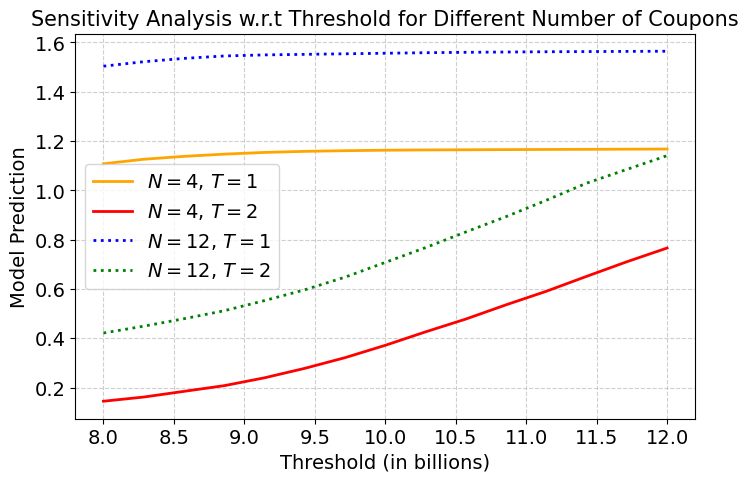

In [82]:
# Define the range for Feature 2 (Threshold)
D_range = np.linspace(8, 12, 15) * 1e9  # Threshold range (in billions)

# Define a fixed value for Feature 1 (Lambda)
lam = 35  # Example fixed value for Lambda
r = 0.03

# Define different pairs of Feature 3 and Feature 4 (e.g., Coupon Payment Frequency)
feature_pairs = [(4, 1), (4, 2), (12, 1), (12, 2)]
colors = ["orange", "red", "blue", "green"]  # Different colors for each pair
linestyles = ['solid', 'solid', 'dotted', 'dotted']

# Prepare inputs for batch processing
all_inputs = []
for (feat3, feat4) in feature_pairs:
    for D in D_range:
        modified_input = np.array([[r, lam, D, feat3, feat4]])
        all_inputs.append(modified_input.flatten())  # Flatten to match model input

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda, Threshold, Feature 3, and Feature 4
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions for easy plotting
predictions = predictions.flatten()  # Convert to a 1D array

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the predictions for each pair of Feature 3 and Feature 4
for idx, (feat3, feat4) in enumerate(feature_pairs):
    # Extract the predictions corresponding to this Feature 3 and Feature 4 pair
    sensitivity_values = predictions[idx * len(D_range):(idx + 1) * len(D_range)]
    
    # Plot GA Change for this Feature 3 and Feature 4 pair
    plt.plot(D_range / 1e9, sensitivity_values, label=fr"$N={feat3}$, $T={feat4}$", 
             color=colors[idx], linestyle=linestyles[idx], linewidth=2)


# Customize plot appearance
plt.xlabel("Threshold (in billions)", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t Threshold for Different Number of Coupons", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

# Save the plot
plt.savefig('Sensitivity_D_coupon.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


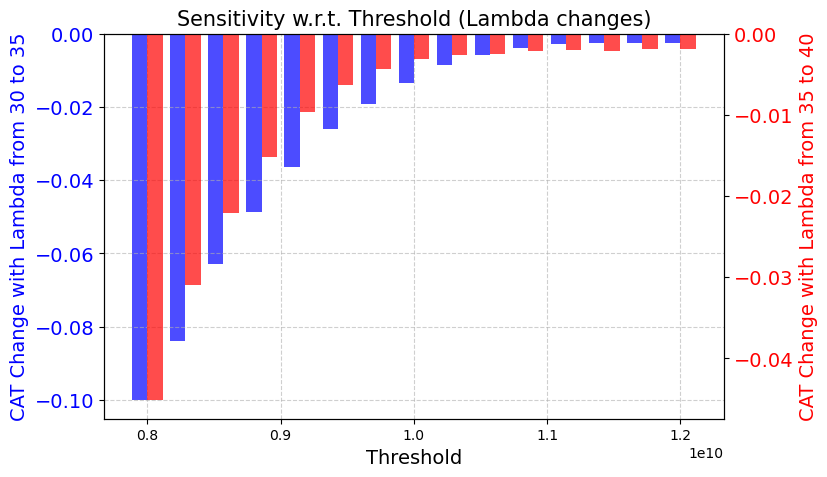

In [86]:
r = 0.03
# Define a range for Feature 2 (Threshold)
D_values = np.linspace(8, 12, 15) * 1e9  # Threshold range (in billions)

# Feature 1 values (Lambdas)
lam_low = 30
lam_high = 35
lam_high2 = 40

# Prepare inputs for batch processing
all_inputs = []

# For Lambda = 30 (low), Lambda = 35 (high), and Lambda = 40 (high2)
for D in D_values:
    all_inputs.append([r, lam_low, D, 4, 1])  # Lambda = 30
    all_inputs.append([r, lam_high, D, 4, 1])  # Lambda = 35
    all_inputs.append([r, lam_high2, D, 4, 1])  # Lambda = 40

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda and Threshold
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions to extract values for each Lambda change
predictions = predictions.flatten()  # Convert to a 1D array

# Split predictions into three parts for the three Lambda scenarios
predictions_low = predictions[0::3]  # Lambda = 30
predictions_high = predictions[1::3]  # Lambda = 35
predictions_high2 = predictions[2::3]  # Lambda = 40

# Compute GA Change
CAT_change = np.array(predictions_high) - np.array(predictions_low)
CAT_change2 = np.array(predictions_high2) - np.array(predictions_high)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width
bar_width = (D_values[1] - D_values[0]) * 0.4  # Dynamically adjust bar width

# Plot blue bars (left y-axis)
ax1.bar(D_values - bar_width / 2, CAT_change2, width=bar_width, alpha=0.7, color="blue", label="CAT Change with Lambda from 30 to 35")
ax1.set_xlabel("Threshold", fontsize=14)
ax1.set_ylabel("CAT Change with Lambda from 30 to 35", color="blue", fontsize=14)
ax1.tick_params(axis="y", labelcolor="blue", labelsize=14)

# Create second y-axis (right side)
ax2 = ax1.twinx()
ax2.bar(D_values + bar_width / 2, CAT_change, width=bar_width, alpha=0.7, color="red", label="CAT Change with Lambda from 35 to 40")
ax2.set_ylabel("CAT Change with Lambda from 35 to 40", color="red", fontsize=14)
ax2.tick_params(axis="y", labelcolor="red", labelsize=14)

# Customize grid and title
ax1.grid(True, linestyle="--", alpha=0.6)
plt.title("Sensitivity w.r.t. Threshold (Lambda changes)", fontsize=15)
plt.savefig('Sensitivity_change_D.eps', format='eps', bbox_inches='tight')

# Show plot
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


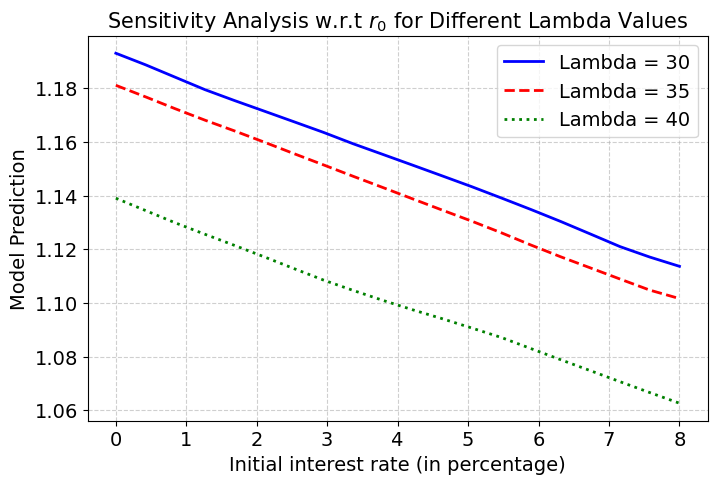

In [88]:
# Define baseline input (Modify based on model's expected input format)
base_input = np.array([[0.03, 35, 9e9, 4, 1]])  # Example: (Feature 1, Feature 2, Feature 3, Feature 4)

# Define a range for Feature 0 (r0)
r_range = np.linspace(0, 0.08, 20)

# Define different fixed values for Feature 1 (Lambda)
lam_values = [30, 35, 40]  # Example fixed values for Lambda

# Colors and line styles for better visualization
colors = ['blue', 'red', 'green']
linestyles = ['solid', 'dashed', 'dotted']

# Create the plot
plt.figure(figsize=(8, 5))

# Prepare inputs for batch processing
all_inputs = []
for lam in lam_values:
    for r in r_range:
        modified_input = base_input.copy()
        modified_input[0, 0] = r  # Modify Lambda (Feature 1)
        modified_input[0, 1] = lam  # Modify Lambda (Feature 1)
        all_inputs.append(modified_input.flatten())

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda and Threshold in one go
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions for easy plotting
predictions = predictions.flatten()  # Convert to a 1D array

# Plot results for each Lambda value
for idx, lam in enumerate(lam_values):
    # Extract the predictions corresponding to this Lambda value
    sensitivity_values = predictions[idx * len(r_range):(idx + 1) * len(r_range)]

    # Plot sensitivity for this Lambda value
    plt.plot(r_range*100, sensitivity_values, label=f"Lambda = {lam}", 
             color=colors[idx], linestyle=linestyles[idx], linewidth=2)


# Customize plot appearance
plt.xlabel("Initial interest rate (in percentage)", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t $r_0$ for Different Lambda Values", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

# Save the plot
plt.savefig('Sensitivity_r.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


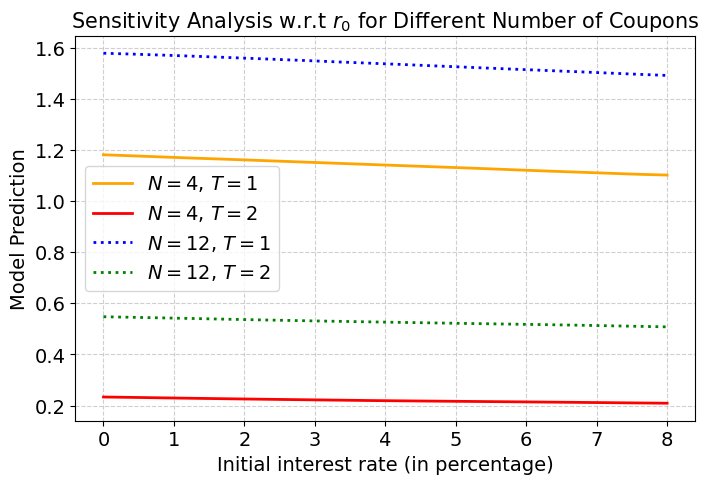

In [90]:
# Define the range for Feature 0
r_range = np.linspace(0, 0.08, 20)  

# Define a fixed value for Feature 1 (Lambda)
lam = 35  # Example fixed value for Lambda
D = 9e9

# Define different pairs of Feature 3 and Feature 4 (e.g., Coupon Payment Frequency)
feature_pairs = [(4, 1), (4, 2), (12, 1), (12, 2)]
colors = ["orange", "red", "blue", "green"]  # Different colors for each pair
linestyles = ['solid', 'solid', 'dotted', 'dotted']

# Prepare inputs for batch processing
all_inputs = []
for (feat3, feat4) in feature_pairs:
    for r in r_range:
        modified_input = np.array([[r, lam, D, feat3, feat4]])
        all_inputs.append(modified_input.flatten())  # Flatten to match model input

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda, Threshold, Feature 3, and Feature 4
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions for easy plotting
predictions = predictions.flatten()  # Convert to a 1D array

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the predictions for each pair of Feature 3 and Feature 4
for idx, (feat3, feat4) in enumerate(feature_pairs):
    # Extract the predictions corresponding to this Feature 3 and Feature 4 pair
    sensitivity_values = predictions[idx * len(r_range):(idx + 1) * len(r_range)]
    
    # Plot GA Change for this Feature 3 and Feature 4 pair
    plt.plot(r_range *100, sensitivity_values, label=fr"$N={feat3}$, $T={feat4}$", 
             color=colors[idx], linestyle=linestyles[idx], linewidth=2)


# Customize plot appearance
plt.xlabel("Initial interest rate (in percentage)", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Sensitivity Analysis w.r.t $r_0$ for Different Number of Coupons", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick label size
plt.tick_params(axis='both', labelsize=14)

# Add legend with larger font and better placement
plt.legend(fontsize=14, loc='best')  # You can change 'best' to 'upper right', etc.

# Save the plot
plt.savefig('Sensitivity_r_coupon.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


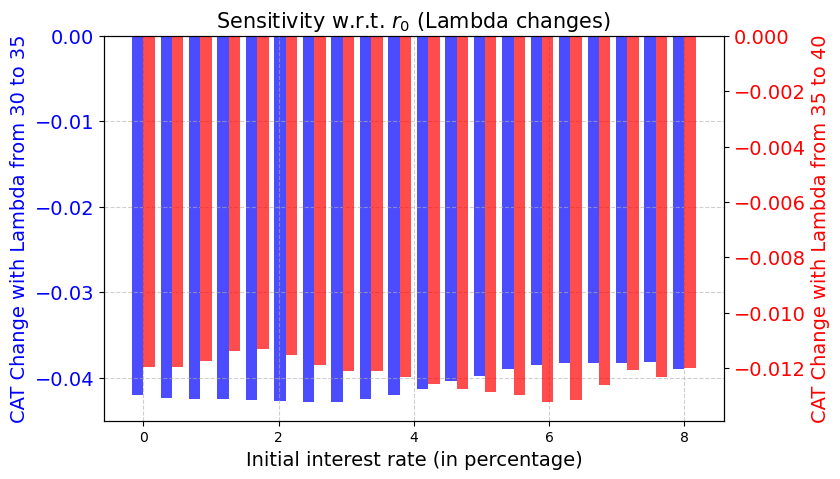

In [92]:
D = 9e9
# Define a range for Feature 0
r_values = np.linspace(0, 0.08, 20) 

# Feature 1 values (Lambdas)
lam_low = 30
lam_high = 35
lam_high2 = 40

# Prepare inputs for batch processing
all_inputs = []

# For Lambda = 30 (low), Lambda = 35 (high), and Lambda = 40 (high2)
for r in r_values:
    all_inputs.append([r, lam_low, D, 4, 1])  # Lambda = 30
    all_inputs.append([r, lam_high, D, 4, 1])  # Lambda = 35
    all_inputs.append([r, lam_high2, D, 4, 1])  # Lambda = 40

# Convert all_inputs to a NumPy array
all_inputs = np.array(all_inputs)

# Scale the entire batch of inputs
all_inputs_scaled = scaler.transform(all_inputs)

# Predict for all combinations of Lambda and Threshold
predictions = model_gamma.predict(all_inputs_scaled)

# Reshape predictions to extract values for each Lambda change
predictions = predictions.flatten()  # Convert to a 1D array

# Split predictions into three parts for the three Lambda scenarios
predictions_low = predictions[0::3]  # Lambda = 30
predictions_high = predictions[1::3]  # Lambda = 35
predictions_high2 = predictions[2::3]  # Lambda = 40

# Compute GA Change
CAT_change = np.array(predictions_high) - np.array(predictions_low)
CAT_change2 = np.array(predictions_high2) - np.array(predictions_high)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width
bar_width = (r_values[1] - r_values[0]) * 0.4 * 100  # Dynamically adjust bar width

# Plot blue bars (left y-axis)
ax1.bar(r_values*100 - bar_width / 2, CAT_change2, width=bar_width, alpha=0.7, color="blue", label="CAT Change with Lambda from 30 to 35")
ax1.set_xlabel("Initial interest rate (in percentage)", fontsize=14)
ax1.set_ylabel("CAT Change with Lambda from 30 to 35", color="blue", fontsize=14)
ax1.tick_params(axis="y", labelcolor="blue", labelsize=14)

# Create second y-axis (right side)
ax2 = ax1.twinx()
ax2.bar(r_values*100 + bar_width / 2, CAT_change, width=bar_width, alpha=0.7, color="red", label="CAT Change with Lambda from 35 to 40")
ax2.set_ylabel("CAT Change with Lambda from 35 to 40", color="red", fontsize=14)
ax2.tick_params(axis="y", labelcolor="red", labelsize=14)

# Customize grid and title
ax1.grid(True, linestyle="--", alpha=0.6)
plt.title("Sensitivity w.r.t. $r_0$ (Lambda changes)", fontsize=15)
plt.savefig('Sensitivity_change_r.eps', format='eps', bbox_inches='tight')

# Show plot
plt.show()